# Introdução

Durante uma análise de um problema podemos lançar uma **hipótese**, isto é, uma afirmação sobre aquele contexto, que pode ou não ser verdadeira. Obviamente, uma boa hipótese é baseda em evidências sólidas e\ou embasada em uma lógica coerente. 

Em muitos casos, no entado, por mais sólida que seja hipótese, não temos meios de confirmar com 100% de certeza a sua veracidade (ou falsidade). São nesses casos que utilizamos ferramentas estatísticas para realizar testes que nos dirão, sempre com uma margem de erro, se a hipótese é ou não verdadeira. Esse é o propósito da **inferência estatística**. 

**Exemplo motivador 1**

Uma fábrica de refrigerante possui uma equipe de controle de qualidade. Uma de suas funções é garantir que as latinhas do seu principal produto, o refrigerante de 300 ml, realmente tenha 300 ml. 

Como garantir que cada latinha de um lote produzido por umas das máquinas realmente tenha 300 ml sem precisar mensurar o conteúdo de todas as latinhas?

**Exemplo motivador 2**

Uma empresa de transportes de carga utiliza um software de otimização para determinar a logística das operações. Essa empresa utiliza vários KPI's (Key Performace Indicator) para medir a qualidade das operações e, por conseguinte, do software. Um desses KPI é a razão entre a quantidade (em toneladas) de demandas atrasadas pelo total (em toneladas) de todas as demandas. A equipe de QA utiliza cenários mensais reais como casos de testes. São 12 cenários, e o KPI deles é apresentado abaixo:

* Janeiro: 0.12
* Fevereiro: 0.29
* Março: 0.07
* Abril: 0
* Maio: 0.17
* Junho: 0.31
* Julho: 0
* Agosto: 0.04
* Setembro: 0.21
* Outubro: 0.13
* Novembro: 0.28
* Dezembro: 0.09

A pedido da gerência, a equipe de desenvolvimento refatorou o software de modo a temtar melhorar seu desempenho e entregar uma otimização mais acurada. Após a melhoria do código, a equipe de QA rodou os casos de teste e obteve os seguinte valores para o KPI:

* Janeiro: 0.11
* Fevereiro: 0.21
* Março: 0.08
* Abril: 0.01
* Maio: 0.12
* Junho: 0.25
* Julho: 0
* Agosto: 0.04
* Setembro: 0.20
* Outubro: 0.14
* Novembro: 0.22
* Dezembro: 0.05

Você, como cientista de dados, deve responder à gerência: ***o software melhrou ou não a qualidade da otimização?***

# Teoria

## Funções densidade de probabilidade

Sendo $x$ uma **variável aleatória**, uma **função densidade de probabilidade** descreve o comportamento probabilístico dessa variável. Em termos mais precisos, a função $f$ é tal que $P(a < x < b) $ é igual a área sob o gráfico de $f$, entre os pontos $a$ e $b$. Além disso, a área sob toda a curva deve ser igual a 1. 

Vide a figura abaixo:

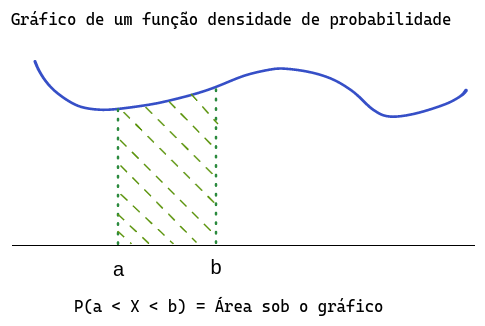

A **distribuição normal** é uma das funções densidade mais importante e aparece com bastante frequência em fenômenos naturais. 

Se uma determinada população segue uma distribuição normal, podemos calcular probabilidades sabendo apenas a média $\mu$ e o desvio-padrão $\sigma$ dessa população, pois sua função densidade de probabilidade é dada por:

$$ f(x) =  \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2}$$




Abaixo, algums exemplos de distribuições normais:

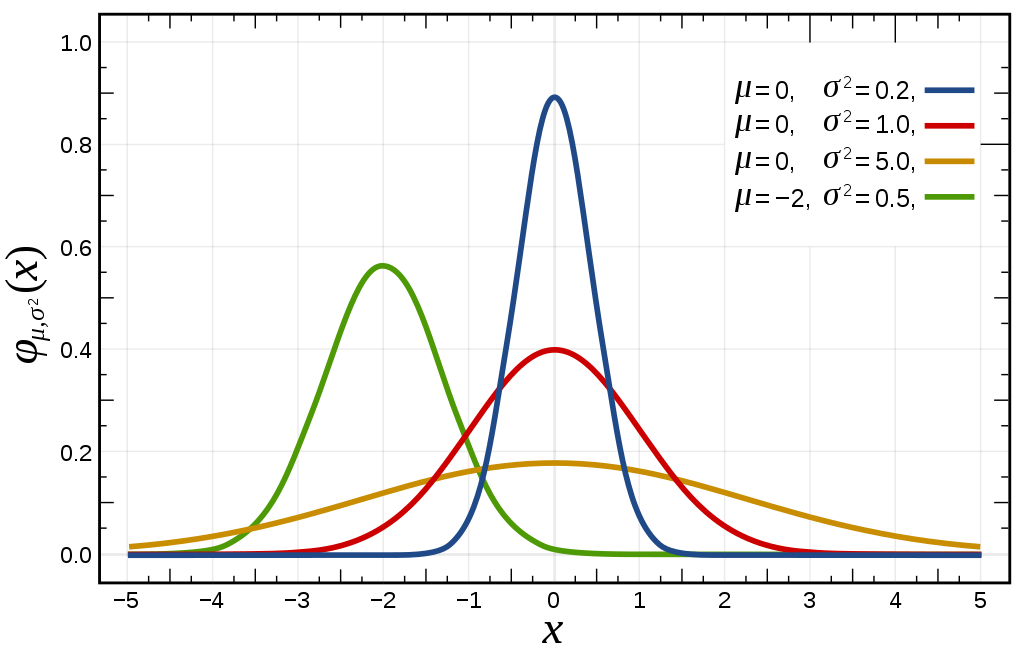

Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_normal)

**Tabuleiro de Galton**: dispositivo mecânico nventado por Sir Francis Galton para demonstrar o teorema do limite central, em particular, que a distribuição normal é aproximada à distribuição binomial.

Veja um exemplo de utilização nesse [vídeo](https://youtube.com/shorts/TwctT3Ncm1w?feature=share)

Toda normal com média $\mu$ e desvio-padrão $\sigma$ pode ser transformada em uma normal de média 0 e desvio-padrão 1 (chamada de **normal padrão**) atrávez da mudança de variáveis:

$$Z = \frac{X-\mu}{\sigma}$$

Podemos ainda consultar rapidamente os valores da função densidade utilizando uma [tabela da normal padrão](https://professorguru.com.br/tabela-normal.html).

Existem outras distribuições além da Gaussiana. Outra bastante utilizada em testes de hipóteses é a **t de Student**. Sua fórmula é dada por 

$$f(x) = \frac{\Gamma(\frac{\nu +1}{2})}{\sqrt{\nu\pi}\Gamma(\frac{\nu}{2})} \left(1 + \frac{x^2}{\nu}\right)^{-(\frac{\nu+1}{2})} $$

onde $\Gamma$ é a função gama e o parâmetro $\nu$ é o grau de liberdade. 

## Teste de Hipóteses

### Conceito

Uma **hipótese estatística** é uma afirmação a respeito de algum parâmetro populacional ou a respeito da distribuição de probabilidade de uma variável aleatória.

Um **teste de hipóteses** é uma metodologia que nos fornece ferramentas para averiguar a validade de uma hipótese estatística. Um teste de hipóteses é sempre realizado sobre uma **amostra**, nunca sobre toda a população. Por esse motivo, há sempre um **erro estatístico** associado ao teste, mas esse erro pode ser controlado. Obviamente, quanto menor o erro, mais restritivo será o teste.

Para entendermos isso, precisamos explicar o que é hipótese nula e hipótese alternativa.

* **Hipótese nula** (denotada por $H_0$): é a hipótese assumida como verdadeira na construção da tese. Ela representa o comportamento esperado da população. Em um teste estatístico, desejamos provar que essa hipótese é falsa.
* **Hipótese alternativa** (denotada por $H_a$): é a hipótese a ser considerada quando a hipótese nula é falsa. Ela representa um comportamento atípico, o qual desejamos validar. Em um teste estatístico, busca-se provar que essa hipótese é verdadeira.

Como dito, ao realizarmos um teste estatístico, estamos correndo o risco de errar em nossa análise, pois estamos olhando apenas para uma amostra, não para a população inteira. 
Há dois tipos de erros que podemos cometer:

* **Erro do Tipo I**: a hipótese é verdadeira, mas foi rejeitada. 
* **Erro do Tipo II**: a hipótese é falsa, mas foi aceita.

Desejamos minimizar ambos os erros, mas é impossível, em geral, minimizá-los ao mesmo tempo. É possível minimizar ambos aumentando o tamanho da amostra.

Na teoria, focamos em evitar cometer erros do tipo I: ***não queremos rejeitar uma hipótese verdadeira***. Mas nunca é possível evitar erros. O melhor que podemos fazer é minimizar a probabilidade de comerter o erro.

O **nível de significância** de teste, denotado por $\alpha$, é a maior probabilidade de ocorrer um erro de tipo I que estamos dispostos a aceitar. Já o valor $1 - \alpha$ é o **nível de confiança** do teste.

Cada valor de $\alpha$ determina no gráfico da distribuição normal duas regiões:

* Região crítica: é a região onde rejeitamos a hipótese nula e aceitamos a hipótese alternativa.
* Região de aceitação: é a região na qual aceitamos a hipótese nula e rejeitamos a hipótese alternativa.

Veja a figura:

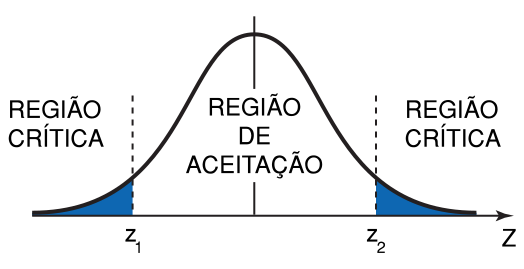

[Fonte da imagem](https://hackinganalytics.wordpress.com/2020/01/22/inferencia-estatistica-teste-de-hipoteses/)

**Passos para realização do teste estatístico**

* Passo 1: Formular as hipóteses
* Passo 2: Escolher a distribuição adequada
* Passo 3: Estipular o nível de significância
* Passo 4: Determinar a região crítica e o valor crítico
* Passo 5: Computar o valor da estatística teste da amostra
* Passo 6: Comparar o valor da estatística teste com o valor crítico:

    a) Se o valor observado estiver dentro da região crítica, rejeitamos a hipótese nula e aceitamos a hipótese alternativa.

    b) Se o valor observado não estiver dentro da região crítica, aceitamos a hipótese nula e rejeitamos a hipótese alternativa.

### Passo 1: Formulação das hipóteses

É preciso formular de forma clara e objetiva as hipóteses nula e alternativa, utilizando a notação matemática correta. Além disso, é preciso analisar o problema e decidir se faremos um teste de hipóteses bicaudal ou unicaudal. 

É bem simples de lembrar: a hipótese nula ($H_0$) sempre está associdada ao sinal de igualdade; já a hipótese alternativa ($H_1$) sempre está associada a desigualdade estrita. 

Lembre que as hipóteses nula e alternativa são complementares, ou seja, a "soma" das duas deve cubrir todas as possibilidades daquele cenário. 



Temos a seguinte divisão:

* Teste bicaudal: $H_0: \mu = \mu_0$ e $H_1: \mu \neq \mu_0$.
* Teste unicaudal:
  * Superior: $H_0: \mu \leq \mu_0$ e $H_1: \mu > \mu_0$
  * Inferior: $H_0: \mu \geq \mu_0$ e $H_1: \mu < \mu_0$

Vide a figura abaixo:

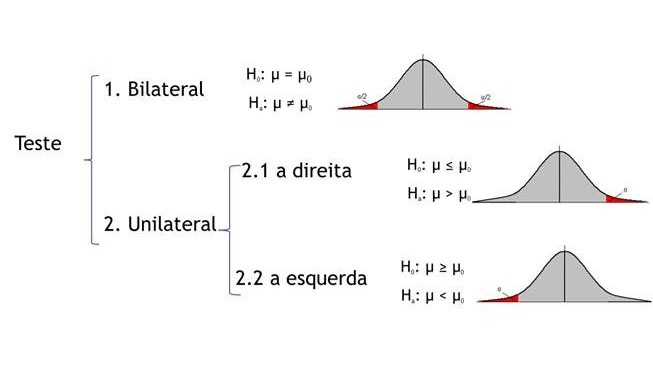

[Fonte da imagem](https://emgotas.com/2016/11/11/o-que-e-um-teste-de-hipoteses/)

Voltando ao exemplo motivador 1, escolheríamos uma amostra representativa do lote de latinhas e mediríamos o volume de cada uma delas. 

A hipóte nula é que a média dos volumes seja 300 ml

A hpótese alternativa é que a média dos volumes seja diferente de 300 ml

Temos nesse exemplo um teste bicaudal.

Em símbolos:

* $H_0: \mu = 300$
* $H_1: \mu \neq 300$

### Passo 2: Escolher a distribuição adequada

* Para amostras grandes ($n \ge 30$), o teorema do limite central garante que podemos utilizar um distribuição normal, desde que o desvio-padrão populacional seja conhecido.
* Para amostras pequenas ($n \le 30$) ou em caso em que o desvio-padrão populacional não é conhecido, usa-se a distribuição t de Student.

### Passo 3: Estipular o nível de significância

O nível de significância é um valor a ser decidido antes de ser efetuado o teste. Ele determina o quanto estamos predispostos a aceitar um erro no teste. Quanto menor o nível de significância, mais rigorosos estamos sendo e, portanto, mais confiável é o teste.

É praxe escolher um nível de significância de 5%, ou seja, um nível de confiança de 95%. Outros níveis de significância comumente usados são 10% e 1%.



### Passo 4: Determinar a região crítica

O nível de significância influencia na região de aceitação e rejeição. Quanto menor o nível de significância, menor é a região crítica, ou seja, mais difícil se tornar de aceitar a hipótese alternativa. Isso pois cada $\alpha$ determina um valor crítico $z_{\alpha}$.

Existem valores tabelados dos valores críticos, dado o nível de significância. Confira:

* Nível de significância: $\alpha=$ 10%
  * Teste bicaudal: valor crítico $z_{\alpha} = 1.645$
  * Teste unicaudal: valor crítico $z_{\alpha} = 1.28$
* Nível de significância: $\alpha=$ 5%
  * Teste bicaudal: valor crítico $z_{\alpha} = 1.96$
  * Teste unicaudal: valor crítico $z_{\alpha} = 1.645$
* Nível de significância: $\alpha=$ 1%
  * Teste bicaudal: valor crítico $z_{\alpha} = 2.58$
  * Teste unicaudal: valor crítico $z_{\alpha} = 2.33$
* Nível de significância: $\alpha=$ 0.5%
  * Teste bicaudal: valor crítico $z_{\alpha} = 2.81$
  * Teste unicaudal: valor crítico $z_{\alpha} = 2.58$

* Para um teste unicaudal superior, a região crítica corresponde à região do gráfico da Gaussina $\{(x,y) \in G \mid x \ge z_{\alpha} \}$ 
* Para um teste unicaudal inferior, a região crítica corresponde à região do gráfico da Gaussina $\{(x,y) \in G \mid x \le -z_{\alpha} \}$ 
* Para um teste bicaudal, a região crítica corresponde à região do gráfico da Gaussina $\{(x,y) \in G \mid x \ge z_{\alpha} \textit{ ou } x \le -z_{\alpha} \}$

### Passo 5: Computar a estatística teste

O cálculo da estatística teste depende de fatores como:
* O tipo de problema que queremos resolver
* Os dados que temos a disposição

Vejamos alguns casos

**Teste Z ou T para média**

Quando a população segue uma distribuição com desvio-padrão $\sigma$ conhecido, utilizamos a seguinte fórmula para o cálculo do valor observado:

$$z = \frac{\overline{x}-\mu}{\frac{\sigma}{\sqrt{n}}} $$
onde:

- $\overline{x}$ é a média amostral;
- $n$ é o tamanho da amostra;
- $\mu$ é a média populacional;
-  $\sigma$ o desvio-padrão populacional.

Se não soubermos o desvio-padrão da população, podemos usar na fórmula o desvio-padrão amostral e distribuição t de Student, em vez da normal padrão, com número de graus de liberdade $\nu = n-1$. Se $n < 30$ também recomenda-se utilzar o teste t de Student.

**Teste para proporção**

Se o problema a ser considerado envolve uma proporção, calculamos a estatística-teste pela seguinte fórmula:

$$z = \frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}$$

onde:
- $\hat{p}$ é a proporção amostral;
- $p$ é a proporção populacional;
- $n$ é o tamanho da amostra.

**Teste pareado**

Quando o problema envolve duas amostras, utilizamos a seguinte fórmula para o cálculo do valor observado:

$$z = \frac{(\overline{x_1} - \overline{x_2}) - (\overline{\mu_1} - \overline{\mu_2})}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

onde, para $i = 1,2$:

- $x_i$ é a média da amostra $i$;
- $n_i$ é o tamanho da amostra $i$;
- $s_i$ é o desvio-padrão da amostra $i$;
- $\mu_i$ é a média da população $i$.

Na maioria dos casos, a população é a mesma e $\mu_1 = \mu_2$.

# Prática

Nessa sessão, vamos pôr em prática a teoria vista na sessão anterior. Em um primeiro momento, implementamos o código em python que utilizaremos logo em seguinte, nos exemplos resolvidos.

## Funções e Classes

In [ ]:
# Importação das bibliotecas
import numpy as np
import math
from scipy.stats import norm, t

O módulo ***norm*** lida com cálculos referentes à distribuição normal, já o módulo ***t*** lida com cálculos referentes à distribuição t de Student.

Ambas possuiem os seguintes métodos:

- cdf: (*cumulative distribution function*), usando para obter o valor da densidade de probabilidade, dado o $z$ escore.
- ppf: (*percent point function*), é a função inversa da cdf, usada para obter o $z$ escore dada a probabilidade associada. 

Ou seja, dado um nível de significância $\alpha$ calculamos o valor crítico $z_{\alpha}$ utilizando função ppf:
* Para um teste bicaudal: $z_{\alpha} = ppf(1 - \alpha/2)$
* Para um teste unicaudal: $z_{\alpha} = ppf(1 - \alpha)$

Vamos agora implementar as classes e funções necessárias, a começar pelas funções que calculam o valor da estatística-teste:

In [ ]:
def z_media(x_bar:float, mu:float, sigma:float, n:int, )-> float:
  """
  Calcula o valor observado para o teste da média
  """
  return math.sqrt(n)*((x_bar - mu)/sigma)

In [ ]:
def z_prop(p_hat, p, n):
  """
  Calcula o valor observado para o teste da proporção
  """
  return (p_hat - p)/math.sqrt(p*(1-p)/n)

In [ ]:
def z_par(x1:float, x2: float, mu1: float, mu2: float, s1: float, s2: float, n1:int, n2: int):
  """
  Calcula o valor observado para o teste de amostras pareadas
  """

  denominador = math.sqrt((s1**2)/(n1**2) + (s2**2)/(n2**2))
  numerador = (x1-x2) - (mu1-mu2)

  return numerador/denominador

Também precisaremos de uma função que retorna a média e o desvio-padrão de uma amostra:

In [ ]:
def computar_media_e_desvio_padrao(amostra: list):
  amostra_np = np.array(amostra)
  media = amostra_np.mean()
  desvio = amostra_np.std()

  return media, desvio

Agora, vamos implementar as classes relacionadas ao teste de hipóteses. 

In [ ]:
from enum import Enum 

class Tipo(Enum):
  NULA = 0
  ALTERNATIVA = 1


class Simbolo(Enum):
  IGUAL = '='
  DIFERENTE = '≠'
  MAIOR = '>'
  MENOR = '<'
  MAIOR_OU_IGUAL = '≥'
  MENOR_OU_IGUAL = '≤'

In [ ]:
class Hipotese:
  """
  Classe que modela uma hipóte estatística
  """
  def __init__(self, tipo: Tipo, simbolo: Simbolo, valor:float, texto_alternativo = ''):
    self.tipo = tipo
    self.simbolo = simbolo
    self.valor = valor
    self.texto_alternativo = texto_alternativo

    self.__validar_tipo()

  def __validar_tipo(self):
    if self.tipo == Tipo.NULA:
      if self.simbolo in [Simbolo.DIFERENTE, Simbolo.MAIOR, Simbolo.MENOR]:
        raise TypeError(f"Hipótese nula não aceita símbolo {self.simbolo.value}")
    
    if self.tipo == Tipo.ALTERNATIVA:
      if self.simbolo in [Simbolo.IGUAL, Simbolo.MAIOR_OU_IGUAL, Simbolo.MENOR_OU_IGUAL]:
        raise TypeError(f"Hipótese alternativa não aceita símbolo {self.simbolo.value}")
  
  def __repr__(self):
    h = 'H_0' if self.tipo == Tipo.NULA else 'H_1'
    return f'{h}: μ {self.simbolo.value} {self.valor}'

In [ ]:
class TesteHipotese:
  """
  Classe que modela um teste de hipóteses
  """
  def __init__(self, h0: Hipotese, h1: Hipotese, alpha: float = 0.05, gl = None, texto_alternativo=''):
    self.h0 = h0
    self.h1 = h1
    self.alpha = alpha
    self.gl = gl
    self.texto_alternativo = texto_alternativo
    self.tipo_de_teste = self.__determinar_tipo_de_teste()
    self.z_critico = self.__calcular_valor_critico()

    self.__validar_teste()

  
  def __validar_teste(self):
    """
    Fica como exercício
    """
    pass

  def __determinar_tipo_de_teste(self):
    if self.h1.simbolo == Simbolo.DIFERENTE:
      return 'BICAUDAL'
    elif self.h1.simbolo == Simbolo.MAIOR:
      return 'UNICAUDAL SUPERIOR'
    elif self.h1.simbolo == Simbolo.MENOR:
      return 'UNICAUDAL INFERIOR'
    else:
      raise TypeError("Símbolo desconhecido")
  
  def __calcular_valor_critico(self):
    divisor = 2 if self.tipo_de_teste == 'BICAUDAL' else 1
    if self.gl is None:
      # normal padrão
      z_critico = norm.ppf(1-self.alpha/divisor)
    else:
      # t de Student
      z_critico = t.ppf(1-self.alpha/divisor, self.gl)

    return z_critico


  def esta_dentro_da_regiao_critica(self, z:float)->bool:
    """
    Retorna True se o valor passado está dentro da região crítica, False caso contrário.
    """
    if self.tipo_de_teste == 'BICAUDAL':
      return (z > self.z_critico) or (z < -self.z_critico)
    elif self.tipo_de_teste == 'UNICAUDAL SUPERIOR':
      return z > self.z_critico
    elif self.tipo_de_teste == 'UNICAUDAL INFERIOR':
      return z < - self.z_critico
    


  def __repr__(self):
    return f'TESTE DE HIPÓTESE {self.tipo_de_teste}\n{self.h0}\n{self.h1}'

Vejamos um exemplo de uso das classes:

In [ ]:
h0 = Hipotese(Tipo.NULA, Simbolo.IGUAL, 2)
h1 = Hipotese(Tipo.ALTERNATIVA, Simbolo.MAIOR, 2)

teste = TesteHipotese(h0,h1)
print(teste.z_critico)
print(teste.esta_dentro_da_regiao_critica(1.7))
teste

In [ ]:
def realizar_teste_de_hipoteses(teste: TesteHipotese, z_observado: float):
  if teste.esta_dentro_da_regiao_critica(z_observado):
    resultado = 'rejeitada'
  else:
    resultado = 'aceita'
  
  print(teste)
  print(f"Ao nível de significância de {100*teste.alpha}% a hipótese nula foi {resultado}")

In [ ]:
realizar_teste_de_hipoteses(teste, 1.7)

Como pode ser muito chato criar os objetos na mão, podemos implementar uma função que criar um teste de hipóteses interativamente, através de uma interface UX simplória:

In [ ]:
def criar_teste_de_hipotese()-> TesteHipotese:
  """
  Função que monta um teste de hipótese interativamente
  """

  mu = float(input("Digite a média: "))

  print("Hipótese nula - selecione o símbolo:")
  print("1 - =\n2 - ≥\n3 - ≤")
  res = input()
  map_simb = {"1": Simbolo.IGUAL, "2": Simbolo.MAIOR_OU_IGUAL, "3": Simbolo.MENOR_OU_IGUAL}
  simb = map_simb[res]
  h0 = Hipotese(Tipo.NULA, simb, mu)

  print("Hipótese alternativa - selecione o símbolo:")
  print("1 - ≠\n2 - >\n3 - <")
  res = input()
  map_simb = {"1": Simbolo.DIFERENTE, "2": Simbolo.MAIOR, "3": Simbolo.MENOR}
  simb = map_simb[res]
  h1 = Hipotese(Tipo.ALTERNATIVA, simb, mu)

  try:
    alpha = float(input("Nível de significância: "))
  except ValueError:
    alpha = 0.05
  
  try:
    gl = float(input("Graus de liberdade: "))
  except ValueError:
    gl = None

  teste = TesteHipotese(h0,h1,alpha,gl)

  return teste


## Exemplos resolvidos

### Exemplo 1: latinhas de refrigerante

Uma fábrica de refrigerante possui uma equipe de controle de qualidade. Uma das funções é garantir que as latinhas do seu principal produto, o refrigerante de 300 ml, realmente tenha 300 ml. 

Sabe-se que as máquinas que enchem as latinhas são calibradas de tal forma que o volume das latinhas segue uma distribuição normal com média 300 ml e desvio-padrão 2 ml. 

Selecionou-se uma amostra de 35 latinhas da produção diária de uma dessas máquinas e constatou-se que para essa amostra, a média dos volumes foi de 297 ml.

É possível afirmar que essa máquina está avariada?

In [ ]:
z_obs = z_media(x_bar=297,mu=300,sigma=7,n=35)
z_obs

In [ ]:
teste = criar_teste_de_hipotese()
realizar_teste_de_hipoteses(teste, z_obs)

### Exemplo 2: KPI de otimização

Uma empresa de transportes de carga utiliza um software de otimização para determinar a logística das operações. Essa empresa utiliza vários KPI's (Key Performace Indicator) para medir a qualidade das operações e, por conseguinte, do software. Um desses KPI é a razão entre a quantidade (em toneladas) de demandas atrasadas pelo total (em toneladas) de todas as demandas. A equipe de QA utiliza cenários mensais reais como casos de testes. São 12 cenários, e o KPI deles é apresentado abaixo:

* Janeiro: 0.12
* Fevereiro: 0.36
* Março: 0.07
* Abril: 0
* Maio: 0.17
* Junho: 0.45
* Julho: 0
* Agosto: 0.04
* Setembro: 0.21
* Outubro: 0.13
* Novembro: 0.31
* Dezembro: 0.09

A pedido da gerência, a equipe de desenvolvimento refatorou o software de modo a temtar melhorar seu desempenho e entregar uma otimização mais acurada. Após a melhoria do código, a equipe de QA rodou os casos de teste e obteve os seguinte valores para o KPI:

* Janeiro: 0.11
* Fevereiro: 0.27
* Março: 0.14
* Abril: 0.02
* Maio: 0.19
* Junho: 0.37
* Julho: 0
* Agosto: 0.06
* Setembro: 0.22
* Outubro: 0.16
* Novembro: 0.27
* Dezembro: 0.07

É possível afirmar que houve uma diminuição do valor médio do KPI?

In [ ]:
kpis_antigos = [0.12, 0.29, 0.07, 0, 0.17, 0.31, 0, 0.04, 0.21, 0.13, 0.28, 0.09]
kpis_novos = [0.11, 0.21, 0.08, 0.01, 0.12, 0.25, 0, 0.04, 0.2, 0.14, 0.22, 0.05]

x1, s1 = computar_media_e_desvio_padrao(kpis_antigos)
x2, s2 = computar_media_e_desvio_padrao(kpis_novos)

In [ ]:
print(x1,x2)
print(s1,s2)

In [ ]:
z_obs = z_par(x1,x2,0,0,s1,s2,len(kpis_antigos),len(kpis_novos))
z_obs

In [ ]:
teste_kpi = criar_teste_de_hipotese()
realizar_teste_de_hipoteses(teste_kpi, z_obs)

# Desafios

**DESAFIO 01**

Uma metalúrgica trabalha laminando placas de aço, transformando-as em produto mais maleável. Esse processo é realizado por máquinas chamadas laminadores. Alguns desses laminadores necessitam que as placas de aço estejam ainda quentes para semrem laminadas. Caso estejam frias, é necessário gastar energia para aquecê-las. Logo, é interessante laminar o produto no mesmo dia em que é produzido pela aciaria. 

A fim de reduzir esse custo energético, a empresa resolveu otimizar o sequenciamento da produção, com o objetivo de melhorar o a laminação feita a quente.

Antes da otimização do processo, a empresa laminava a quente, em média, 16,2% da produção diária. Após a implementação do novo sistema, a empresa analisou os dados de produção por 86 dias e constatou que a média subiu para 24,3%.

Ao nível de significância de 5%, é realmente possível afirmar que o processo de otimização aumentou a taxa de laminação a quente?

**DESAFIO 02**

Implemente o método *__validar_teste* na classe **TesteHipotese**

**DESAFIO 03**

Implemente uma classe Enum para armazenar as constantes "BICAUDAL", "UNICAUDAL SUPERIOR" e "UNICAUDAL INFERIOR". Refatore todo o código para utilizar essa classe onde for necessário.

**DESAFIO 04**

Implemente testes unitários para todas as funções e métodos desse notebook.

**DESAFIO 05**

Refatore a função *realizar_teste_de_hipóteses*() para que ela exiba, além dos resultados do teste, um gráfico da normal padrão, destacando a região crítica, o valor crítico e o valor observado.

**DESAFIO 06**

Crie uma aplicação utilizando [Streamlit](https://medium.com/data-hackers/desenvolvimento-de-um-aplicativo-web-utilizando-python-e-streamlit-b929888456a5) que utilize as funções desse notebook para realizar testes de hipóteses

**DESAFIO 07**

Crie uma aplicação utilizando [Flask](https://youtu.be/K2ejI4z8Mbg) que utilize as funções desse notebook para realizar testes de hipóteses

# Referências e links adicionais

* [Playlist sobre a distribuição normal](https://youtube.com/playlist?list=PL7xT0Gz6G0-Q5qb_8EovDacbfD-67UuWu)
* [Playlist sobre teste de hipóteses](https://youtube.com/playlist?list=PL7xT0Gz6G0-TfV-S6WiGDvIsZds6Pv_g8)
* [Documentação oficial do Scipy Stats](https://docs.scipy.org/doc/scipy/reference/stats.html) (em inglês)
* [Breve explicação sobre classes e métodos](https://youtu.be/j6B8shHXzks)
* [Vídeo sobre Enumerações em Python](https://youtu.be/v8GYjlt94RI)